In [71]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

1_moment avg: 0.5952
1_moment cwtm: 0.8707
1_moment meamed: 0.6822
1_moment cwm: 0.7746
2_moments avg: 0.6158
2_moments cwtm: 0.7799
2_moments meamed: 0.6865
2_moments cwm: 0.7769


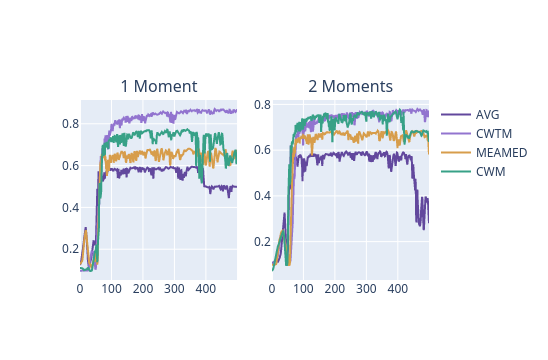

In [108]:
fig = make_subplots(rows=1, cols=2, subplot_titles = ["1 Moment", "2 Moments"])
attack = "little" # little, label_flip

x = np.arange(500)

for idx, moments in enumerate(["1_moment", "2_moments"]):
    
    results_avg = np.load(f"results/test_accuracy/{moments}/{attack}/avg_15_5_500_(0.9, 0.999).npy", allow_pickle=True) 
    results_cwtm = np.load(f"results/test_accuracy/{moments}/{attack}/cwtm_15_5_500_(0.9, 0.999).npy", allow_pickle=True) 
    results_meamed = np.load(f"results/test_accuracy/{moments}/{attack}/meamed_15_5_500_(0.9, 0.999).npy", allow_pickle=True) 
    results_cwm = np.load(f"results/test_accuracy/{moments}/{attack}/cwm_15_5_500_(0.9, 0.999).npy", allow_pickle=True) 
    
    print(f"{moments} avg: {np.max(results_avg)}")
    print(f"{moments} cwtm: {np.max(results_cwtm)}")
    print(f"{moments} meamed: {np.max(results_meamed)}")
    print(f"{moments} cwm: {np.max(results_cwm)}")


    fig.add_trace(
        go.Scatter(
            name = "AVG",
            x = x,
            y = results_avg[0],
            mode = 'lines',
            legendgroup = "g1",
            showlegend= True if idx==1 else False,
            line_color='#62489d'
        ), row=1, col=idx+1
    )

    fig.add_trace(
        go.Scatter(
            name = "CWTM",
            x = x,
            y = results_cwtm[0],
            mode = 'lines',
            legendgroup = "g1",
            showlegend= True if idx==1 else False,
            line_color='#9274cf'
        ), row=1, col=idx+1
    )

    fig.add_trace(
        go.Scatter(
            name = "MEAMED",
            x = x,
            y = results_meamed[0],
            mode = 'lines',
            legendgroup = "g1",
            showlegend= True if idx==1 else False,
            line_color='#d79d4b'
        ), row=1, col=idx+1
    )

    fig.add_trace(
        go.Scatter(
            name = "CWM",
            x = x,
            y = results_cwm[0],
            mode = 'lines',
            legendgroup = "g1",
            showlegend= True if idx==1 else False,
            line_color='#37a187'
        ), row=1, col=idx+1
    )

    # #1d7760
    
fig.show()

In [12]:
x = np.arange(1000)

# avg
mean_avg = np.mean(results_avg, 0)
std_avg = np.std(results_avg, 0)

mean_with_std_avg = mean_avg+std_avg
mean_no_std_avg = mean_avg-std_avg

# cwtm
mean_cwtm = np.mean(results_cwtm, 0)
std_cwtm = np.std(results_cwtm, 0)

mean_with_std_cwtm = mean_cwtm+std_cwtm
mean_no_std_cwtm = mean_cwtm-std_cwtm

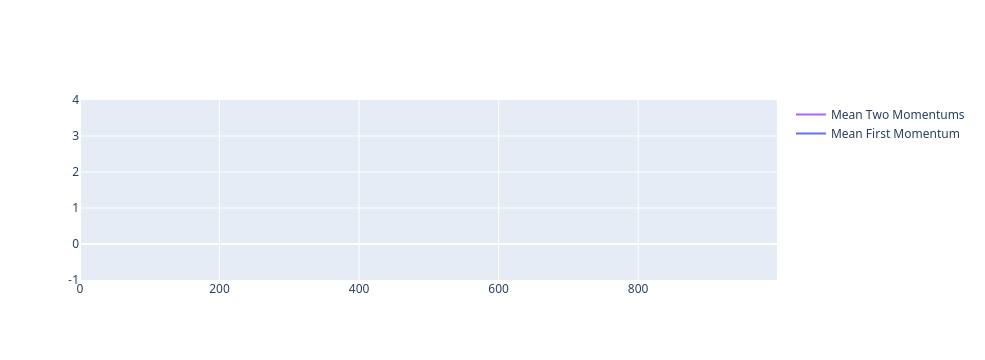

In [13]:
fig = go.Figure([
    go.Scatter(
        name = "Mean First Momentum",
        x = x,
        y = mean_avg,
        mode = 'lines'
    ),
    go.Scatter(
        name = "Std lower",
        x = x, 
        y = mean_no_std_avg,
        mode = 'lines',
        marker = dict(color='#444'),
        showlegend=False,
        line=dict(width=0),
    ),
    go.Scatter(
        name = "Std upper",
        x = x, 
        y = mean_with_std_avg,
        mode = 'lines',
        marker = dict(color='#444'),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False,
        line=dict(width=0),
    ),
    go.Scatter(
        name = "Mean Two Momentums",
        x = x,
        y = mean_cwtm,
        mode = 'lines'
    ),
    go.Scatter(
        name = "Std lower",
        x = x, 
        y = mean_no_std_cwtm,
        mode = 'lines',
        marker = dict(color='#444'),
        showlegend=False,
        line=dict(width=0),
    ),
    go.Scatter(
        name = "Std upper",
        x = x, 
        y = mean_with_std_cwtm,
        mode = 'lines',
        marker = dict(color='#444'),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False,
        line=dict(width=0),
    ),
])
#fig.update_yaxes(rangemode='tozero')
fig.show()